In [1]:
import os
os.environ["PATH"] += os.pathsep + "/Users/patel/anaconda3/Library/include/graphviz"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("/Users/patel/Downloads/archive (1)/Bengaluru_House_Data.csv")

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data_1 = data.drop(['area_type','balcony','availability','society'],axis=1)
data_1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
data_1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
data_2 = data_1.dropna()
data_2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
data_2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
data_cleaned = data_2.reset_index(drop=True)
data_cleaned

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13241,Whitefield,5 Bedroom,3453,4.0,231.00
13242,Richards Town,4 BHK,3600,5.0,400.00
13243,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13244,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
data_cleaned['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
data_cleaned['bhk'] = data_cleaned['size'].apply(lambda x: int(x.split(' ')[0]))
data_cleaned

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13241,Whitefield,5 Bedroom,3453,4.0,231.00,5
13242,Richards Town,4 BHK,3600,5.0,400.00,4
13243,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13244,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
data_cleaned['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

C:\Users\patel\AppData\Local\Temp\ipykernel_13660\3335537428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['bhk'])


<Axes: xlabel='bhk', ylabel='Density'>

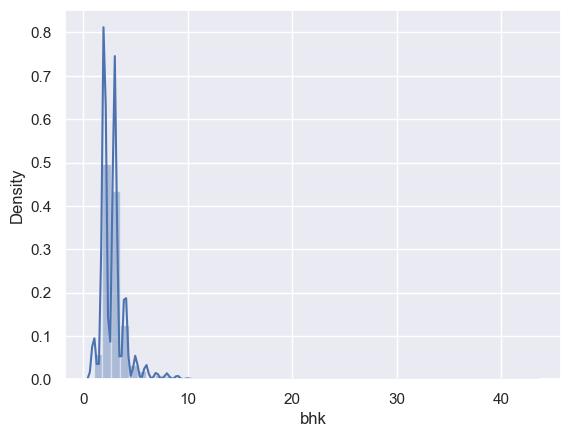

In [15]:
sns.distplot(data_cleaned['bhk'])

In [16]:
print('Highest value of bhk', round(data_cleaned['bhk'].mean()+3*data_cleaned['bhk'].std(),3))
print('Lowest value of bhk', round(data_cleaned['bhk'].mean()-3*data_cleaned['bhk'].std(),3))

Highest value of bhk 6.689
Lowest value of bhk -1.085


In [17]:
data_cleaned_1 = data_cleaned[(data_cleaned['bhk']<6.689) & (data_cleaned['bhk']>-1.085)]
data_cleaned_1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13241,Whitefield,5 Bedroom,3453,4.0,231.00,5
13242,Richards Town,4 BHK,3600,5.0,400.00,4
13243,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13244,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [18]:
data_cleaned_1 = data_cleaned_1.reset_index(drop=True)

In [19]:
data_cleaned_1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
12972,Whitefield,5 Bedroom,3453,4.0,231.00,5
12973,Richards Town,4 BHK,3600,5.0,400.00,4
12974,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
12975,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [20]:
data_cleaned_1['bhk'].unique()

array([2, 4, 3, 6, 1, 5], dtype=int64)

In [21]:
data_cleaned_1['total_sqft'].unique()
data_cleaned_1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
12972,Whitefield,5 Bedroom,3453,4.0,231.00,5
12973,Richards Town,4 BHK,3600,5.0,400.00,4
12974,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
12975,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [22]:
data_cleaned_1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
12972,Whitefield,5 Bedroom,3453,4.0,231.00,5
12973,Richards Town,4 BHK,3600,5.0,400.00,4
12974,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
12975,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [23]:
def float_or_not(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
data_cleaned_1[~data_cleaned_1['total_sqft'].apply(float_or_not)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
117,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
131,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
157,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
180,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
397,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
533,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
641,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
651,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4
748,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,59.935,2


In [25]:
data_cleaned_1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
12972,Whitefield,5 Bedroom,3453,4.0,231.00,5
12973,Richards Town,4 BHK,3600,5.0,400.00,4
12974,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
12975,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [26]:
def convert_to_float(x):
    new_values = x.split('-')
    if len(new_values)==2 :
        return (float(new_values[0])+float(new_values[1])) / 2
    try :
        return float(x)
    except :
        return None



In [27]:
convert_to_float('2560')

2560.0

In [28]:
data_cleaned_2 = data_cleaned_1.copy()
data_cleaned_2['total_sqft'] = data_cleaned_2['total_sqft'].apply(convert_to_float)
data_cleaned_2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
12972,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
12973,Richards Town,4 BHK,3600.0,5.0,400.00,4
12974,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
12975,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [29]:
data_cleaned_2 = data_cleaned_2.reset_index(drop=True)
data_cleaned_2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
12972,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
12973,Richards Town,4 BHK,3600.0,5.0,400.00,4
12974,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
12975,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [30]:
data_cleaned_2[data_cleaned_2['bath']>6]

,location,size,total_sqft,bath,price,bhk
80,Hegde Nagar,6 Bedroom,3000.00,7.0,210.0,6
400,Mahalakshmi Layout,6 Bedroom,1200.00,7.0,250.0,6
475,Old Madras Road,5 BHK,4500.00,7.0,337.0,5
759,Mylasandra,6 Bedroom,900.00,7.0,76.0,6
1029,2nd Stage Nagarbhavi,6 Bedroom,3000.00,8.0,451.0,6
1034,2nd Stage Nagarbhavi,6 Bedroom,2400.00,8.0,450.0,6
1103,R.T. Nagar,6 Bedroom,1200.00,7.0,165.0,6
1810,Kasavanhalli,5 Bedroom,5800.00,7.0,1200.0,5
1817,7th Phase JP Nagar,6 BHK,5080.00,7.0,450.0,6
2166,Bileshivale,6 Bedroom,2400.00,7.0,110.0,6


C:\Users\patel\AppData\Local\Temp\ipykernel_13660\3800832213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_2['bath'])


<Axes: xlabel='bath', ylabel='Density'>

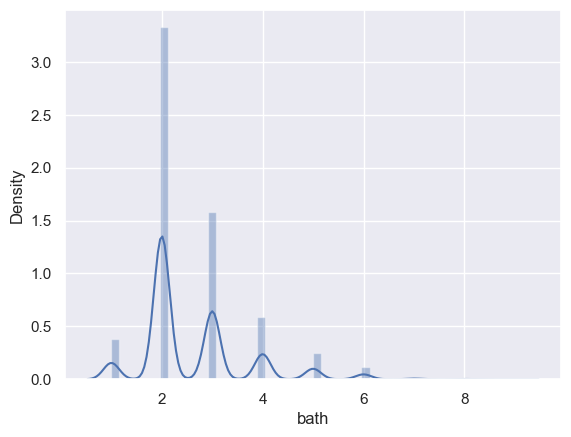

In [31]:
sns.distplot(data_cleaned_2['bath'])

In [32]:
print('Highest value of bath', round(data_cleaned_2['bath'].mean()+3*data_cleaned_2['bath'].std(),3))
print('Lowest value of bath', round(data_cleaned_2['bath'].mean()-3*data_cleaned_2['bath'].std(),3))

Highest value of bath 5.718
Lowest value of bath -0.542


In [33]:
data_cleaned_3 = data_cleaned_2[(data_cleaned['bhk']<7) & (data_cleaned['bhk']>-0.542)]
data_cleaned_3

C:\Users\patel\AppData\Local\Temp\ipykernel_13660\3942223166.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned_3 = data_cleaned_2[(data_cleaned['bhk']<7) & (data_cleaned['bhk']>-0.542)]


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
12972,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
12973,Richards Town,4 BHK,3600.0,5.0,400.00,4
12974,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
12975,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [34]:
data_cleaned_3 = data_cleaned_3.reset_index(drop=True)
data_cleaned_3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
12713,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
12714,Richards Town,4 BHK,3600.0,5.0,400.00,4
12715,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
12716,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


C:\Users\patel\AppData\Local\Temp\ipykernel_13660\2243756362.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_3['price'])


<Axes: xlabel='price', ylabel='Density'>

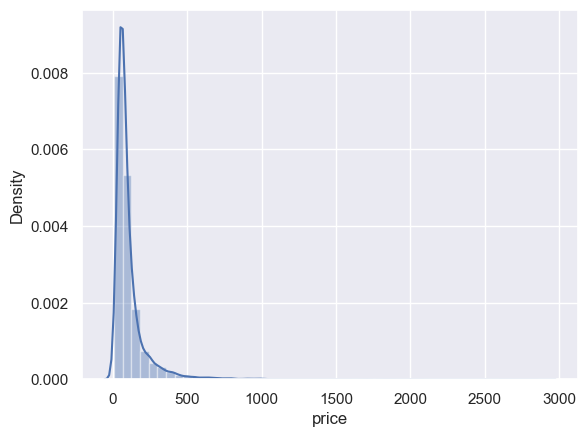

In [35]:
sns.distplot(data_cleaned_3['price'])

In [36]:
data_cleaned_3[data_cleaned_3.price>534.508]

,location,size,total_sqft,bath,price,bhk
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4
59,Whitefield,4 Bedroom,5700.0,5.0,650.0,4
145,Mahalakshmi Layout,4 Bedroom,3750.0,4.0,760.0,4
417,Whitefield,4 Bedroom,11890.0,4.0,700.0,4
609,"6th block banashankari 3rd stage, 100 feet ORR",3 Bedroom,4000.0,3.0,660.0,3
...,...,...,...,...,...,...
12505,Sathya Sai Layout,4 BHK,6652.0,6.0,660.0,4
12514,Church Street,4 BHK,2920.0,4.0,536.0,4
12529,Sathya Sai Layout,4 Bedroom,6688.0,6.0,700.0,4
12603,Ramakrishnappa Layout,4 Bedroom,9200.0,4.0,2600.0,4


In [37]:
print('Highest value of price', round(data_cleaned_3['price'].mean()+3*data_cleaned_3['price'].std(),3))
print('Lowest value of price', round(data_cleaned_3['price'].mean()-3*data_cleaned_3['price'].std(),3))

Highest value of price 534.508
Lowest value of price -315.387


In [38]:
data_cleaned_4 = data_cleaned_3[(data_cleaned_3['price']<534.508) & (data_cleaned_3['price']>-315.387)]
data_cleaned_4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
12713,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
12714,Richards Town,4 BHK,3600.0,5.0,400.00,4
12715,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
12716,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [39]:
data_cleaned_4 = data_cleaned_4.reset_index(drop=True)
data_cleaned_4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
12514,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
12515,Richards Town,4 BHK,3600.0,5.0,400.00,4
12516,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
12517,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [40]:
data_cleaned_4.head(15)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Marathahalli,3 BHK,1310.0,3.0,63.25,3
8,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6
9,Whitefield,3 BHK,1800.0,2.0,70.00,3


In [41]:
location = data_cleaned_4['location'].value_counts()

In [42]:
location

Whitefield         504
Sarjapur  Road     379
Electronic City    297
Kanakpura Road     260
Thanisandra        229
                  ... 
Hennur Busstop       1
Fraser town          1
NTI Layout           1
GB Palya             1
Abshot Layout        1
Name: location, Length: 1242, dtype: int64

In [43]:
locations_Less_than_10=location[location<=10]
locations_Less_than_10

Tindlu            10
Kodigehalli       10
Gunjur Palya      10
Badavala Nagar    10
Nehru Nagar       10
                  ..
Hennur Busstop     1
Fraser town        1
NTI Layout         1
GB Palya           1
Abshot Layout      1
Name: location, Length: 1015, dtype: int64

In [44]:
data_cleaned_4['location'] = data_cleaned_4['location'].apply(lambda x: "other" if x in locations_Less_than_10 else x)
data_cleaned_4['location'].value_counts()

other                        2763
Whitefield                    504
Sarjapur  Road                379
Electronic City               297
Kanakpura Road                260
                             ... 
Pattandur Agrahara             11
Karuna Nagar                   11
2nd Phase Judicial Layout      11
Benson Town                    11
Vasanthapura                   11
Name: location, Length: 228, dtype: int64

In [45]:
frequency_map = data_cleaned_4['location'].value_counts(normalize=True).to_dict()
frequency_map

{'other': 0.22070452911574406,
 'Whitefield': 0.040258806613946804,
 'Sarjapur  Road': 0.030273983545011582,
 'Electronic City': 0.02372393961179008,
 'Kanakpura Road': 0.020768431983385256,
 'Thanisandra': 0.01829219586228932,
 'Yelahanka': 0.01645498841760524,
 'Uttarahalli': 0.014537902388369679,
 'Marathahalli': 0.013499480789200415,
 'Hebbal': 0.01325984503554597,
 'Raja Rajeshwari Nagar': 0.012860452112788561,
 '7th Phase JP Nagar': 0.011662273344516335,
 'Hennur Road': 0.011662273344516335,
 'Bannerghatta Road': 0.011342759006310408,
 'Haralur Road': 0.011103123252655963,
 'Electronic City Phase II': 0.010224458822589664,
 'Chandapura': 0.007508586947839284,
 'Bellandur': 0.007428708363287803,
 'Rajaji Nagar': 0.0073488297787363205,
 'Electronics City Phase 1': 0.006709801102324467,
 'Hoodi': 0.006550043933221504,
 'Yeshwanthpur': 0.006550043933221504,
 'Begur Road': 0.006550043933221504,
 'KR Puram': 0.006470165348670022,
 'Sarjapur': 0.0063902867641185395,
 'Harlur': 0.0062305

In [46]:
data_cleaned_4['location_freq_encoded'] = data_cleaned_4['location'].map(frequency_map)
data_cleaned_4

,location,size,total_sqft,bath,price,bhk,location_freq_encoded
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,0.010224
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,0.001278
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,0.014538
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,0.001837
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,0.004873
...,...,...,...,...,...,...,...
12514,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,0.040259
12515,other,4 BHK,3600.0,5.0,400.00,4,0.220705
12516,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,0.012860
12517,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,0.002237


In [47]:
data_cleaned_4 = data_cleaned_4.drop('location',axis=1)

In [48]:
data_cleaned_4 = data_cleaned_4.drop('size',axis=1)

In [49]:
data_cleaned_4

,total_sqft,bath,price,bhk,location_freq_encoded
0,1056.0,2.0,39.07,2,0.010224
1,2600.0,5.0,120.00,4,0.001278
2,1440.0,2.0,62.00,3,0.014538
3,1521.0,3.0,95.00,3,0.001837
4,1200.0,2.0,51.00,2,0.004873
...,...,...,...,...,...
12514,3453.0,4.0,231.00,5,0.040259
12515,3600.0,5.0,400.00,4,0.220705
12516,1141.0,2.0,60.00,2,0.012860
12517,4689.0,4.0,488.00,4,0.002237


C:\Users\patel\AppData\Local\Temp\ipykernel_13660\3427349798.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_4['price'])


<Axes: xlabel='price', ylabel='Density'>

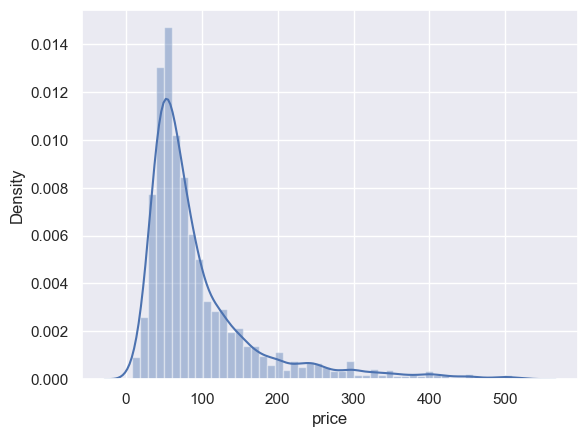

In [50]:
sns.distplot(data_cleaned_4['price'])

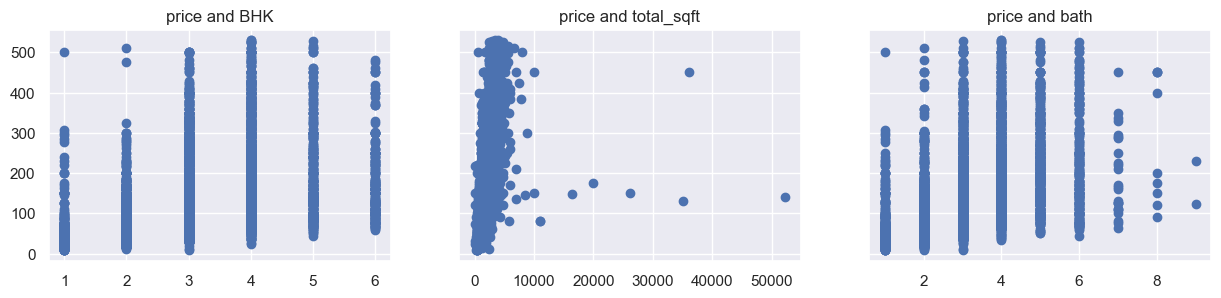

In [51]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned_4['bhk'],data_cleaned_4['price'])
ax1.set_title('price and BHK')
ax2.scatter(data_cleaned_4['total_sqft'],data_cleaned_4['price'])
ax2.set_title('price and total_sqft')
ax3.scatter(data_cleaned_4['bath'],data_cleaned_4['price'])
ax3.set_title('price and bath')
plt.show()

In [52]:
log_price = np.log(data_cleaned_4['price'])
data_cleaned_4['Log_Price'] = log_price
data_cleaned_4

,total_sqft,bath,price,bhk,location_freq_encoded,Log_Price
0,1056.0,2.0,39.07,2,0.010224,3.665355
1,2600.0,5.0,120.00,4,0.001278,4.787492
2,1440.0,2.0,62.00,3,0.014538,4.127134
3,1521.0,3.0,95.00,3,0.001837,4.553877
4,1200.0,2.0,51.00,2,0.004873,3.931826
...,...,...,...,...,...,...
12514,3453.0,4.0,231.00,5,0.040259,5.442418
12515,3600.0,5.0,400.00,4,0.220705,5.991465
12516,1141.0,2.0,60.00,2,0.012860,4.094345
12517,4689.0,4.0,488.00,4,0.002237,6.190315


In [53]:
data_cleaned_4

,total_sqft,bath,price,bhk,location_freq_encoded,Log_Price
0,1056.0,2.0,39.07,2,0.010224,3.665355
1,2600.0,5.0,120.00,4,0.001278,4.787492
2,1440.0,2.0,62.00,3,0.014538,4.127134
3,1521.0,3.0,95.00,3,0.001837,4.553877
4,1200.0,2.0,51.00,2,0.004873,3.931826
...,...,...,...,...,...,...
12514,3453.0,4.0,231.00,5,0.040259,5.442418
12515,3600.0,5.0,400.00,4,0.220705,5.991465
12516,1141.0,2.0,60.00,2,0.012860,4.094345
12517,4689.0,4.0,488.00,4,0.002237,6.190315


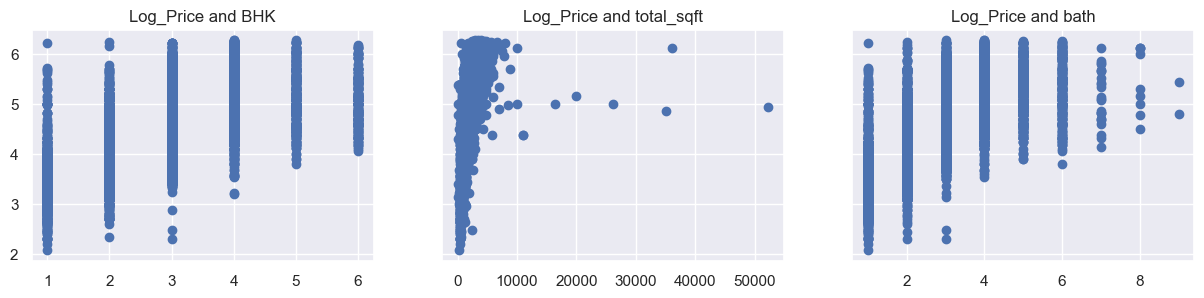

In [54]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned_4['bhk'],data_cleaned_4['Log_Price'])
ax1.set_title('Log_Price and BHK')
ax2.scatter(data_cleaned_4['total_sqft'],data_cleaned_4['Log_Price'])
ax2.set_title('Log_Price and total_sqft')
ax3.scatter(data_cleaned_4['bath'],data_cleaned_4['Log_Price'])
ax3.set_title('Log_Price and bath')
plt.show()

In [55]:
data_cleaned_4 = data_cleaned_4.drop('price',axis=1)
data_cleaned_4

,total_sqft,bath,bhk,location_freq_encoded,Log_Price
0,1056.0,2.0,2,0.010224,3.665355
1,2600.0,5.0,4,0.001278,4.787492
2,1440.0,2.0,3,0.014538,4.127134
3,1521.0,3.0,3,0.001837,4.553877
4,1200.0,2.0,2,0.004873,3.931826
...,...,...,...,...,...
12514,3453.0,4.0,5,0.040259,5.442418
12515,3600.0,5.0,4,0.220705,5.991465
12516,1141.0,2.0,2,0.012860,4.094345
12517,4689.0,4.0,4,0.002237,6.190315


In [56]:
data_cleaned_4 = data_cleaned_4.dropna(axis=0)
data_cleaned_4

,total_sqft,bath,bhk,location_freq_encoded,Log_Price
0,1056.0,2.0,2,0.010224,3.665355
1,2600.0,5.0,4,0.001278,4.787492
2,1440.0,2.0,3,0.014538,4.127134
3,1521.0,3.0,3,0.001837,4.553877
4,1200.0,2.0,2,0.004873,3.931826
...,...,...,...,...,...
12514,3453.0,4.0,5,0.040259,5.442418
12515,3600.0,5.0,4,0.220705,5.991465
12516,1141.0,2.0,2,0.012860,4.094345
12517,4689.0,4.0,4,0.002237,6.190315


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned_4[['total_sqft','bath','bhk','location_freq_encoded']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [58]:
vif

,VIF,features
0,3.872697,total_sqft
1,27.575512,bath
2,27.036446,bhk
3,1.389632,location_freq_encoded


C:\Users\patel\AppData\Local\Temp\ipykernel_13660\1726082795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_4['Log_Price'])


<Axes: xlabel='Log_Price', ylabel='Density'>

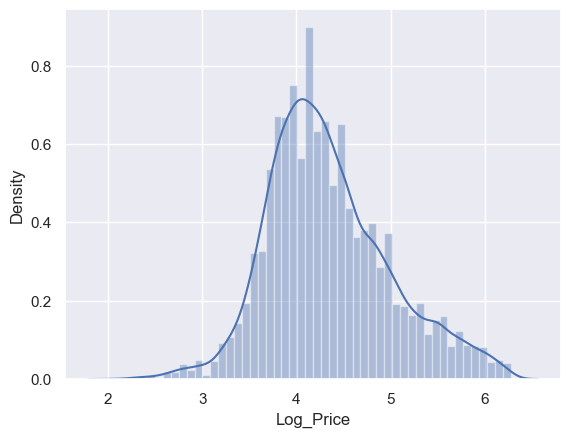

In [59]:
sns.distplot(data_cleaned_4['Log_Price'])

In [60]:
targets = data_cleaned_4['Log_Price']
inputs = data_cleaned_4.drop('Log_Price',axis=1)

In [61]:
inputs

,total_sqft,bath,bhk,location_freq_encoded
0,1056.0,2.0,2,0.010224
1,2600.0,5.0,4,0.001278
2,1440.0,2.0,3,0.014538
3,1521.0,3.0,3,0.001837
4,1200.0,2.0,2,0.004873
...,...,...,...,...
12514,3453.0,4.0,5,0.040259
12515,3600.0,5.0,4,0.220705
12516,1141.0,2.0,2,0.012860
12517,4689.0,4.0,4,0.002237


In [62]:
inputs_1 = sm.add_constant(inputs)
results = sm.OLS(targets,inputs).fit()

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Log_Price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          4.805e+04
Date:                Sun, 06 Aug 2023   Prob (F-statistic):                        0.00
Time:                        13:13:30   Log-Likelihood:                         -18702.
No. Observations:               12478   AIC:                                  3.741e+04
Df Residuals:                   12474   BIC:                                  3.744e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
total_sqft                0.0003   1.07e-05     29.603      0.000       0.000       0.000
bath                      0.3050      0.019     16.486      0.000       0.269       0.341
bhk                       1.0032      0.018     56.170      0.000       0.968       1.038
location_freq_encoded     1.7226      0.110     15.708      0.000       1.508       1.938
==============================================================================
Omnibus:                     4883.607   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47648.352
Skew:                          -1.605   Prob(JB):                         0.00
Kurtosis:                      12.019   Cond. No.                     2.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
scaler.fit(inputs)

StandardScaler()

In [66]:
input_scaled = scaler.transform(inputs)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_scaled,targets,test_size=0.3,random_state=365)

In [68]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)
# This is the log linear regression as the dependant variable is the log of price

LinearRegression()

In [69]:
reg.fit(x_train,y_train)


LinearRegression()

In [70]:
y_hat = reg.predict(x_train)
y_hat

array([4.06792166, 4.04705733, 4.52802026, ..., 4.04277217, 4.06697923,
       4.07252424])

C:\Users\patel\AppData\Local\Temp\ipykernel_13660\2222469225.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals pdf')

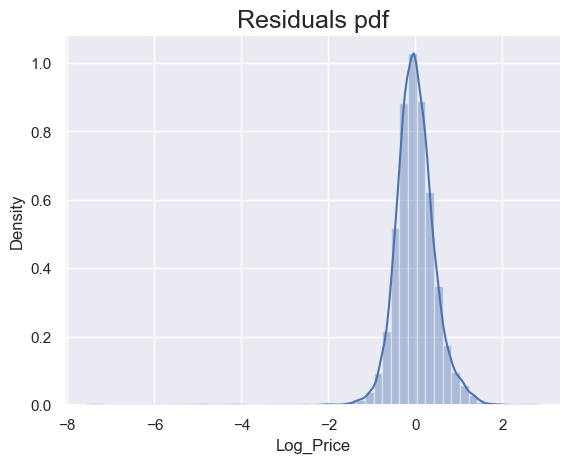

In [71]:
sns.distplot(y_train - y_hat)
plt.title('Residuals pdf',size=18)

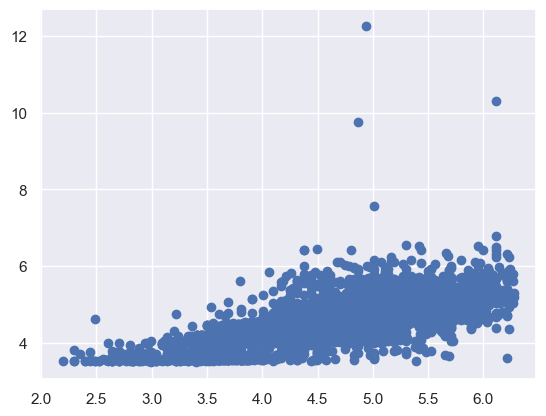

In [72]:
plt.scatter(y_train,y_hat)

In [73]:
reg.score(x_train,y_train)

0.5324332903184885

In [74]:
reg.intercept_

4.338844841647987

In [75]:
reg.coef_

array([0.15785126, 0.25234971, 0.13834379, 0.01568101])

In [76]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,total_sqft,0.157851
1,bath,0.252350
2,bhk,0.138344
3,location_freq_encoded,0.015681


In [77]:
y_hat_test = reg.predict(x_test)

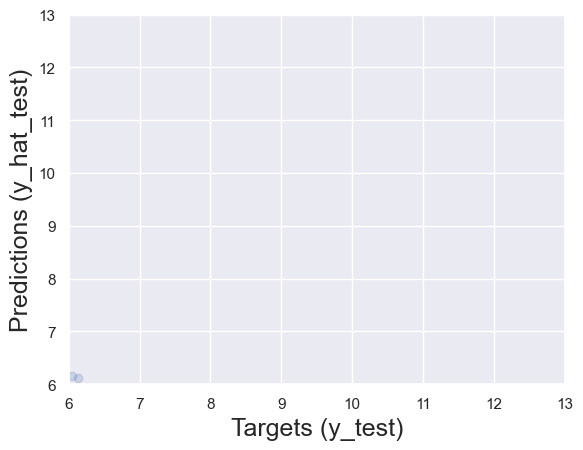

In [78]:
plt.scatter(y_test, y_hat_test,alpha=0.2)
# Let's also name the axes
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [79]:
y_test.shape

(3744,)

In [80]:
r2 = reg.score(x_test,y_test)
r2

0.5548038874766209

In [81]:
n = inputs.shape[0]
p = inputs.shape[1]

In [82]:
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
adj_r2

0.5546611163349473

In [83]:
from sklearn.metrics import max_error
max_error(y_test,y_hat_test)

2.2537879518263297

C:\Users\patel\AppData\Local\Temp\ipykernel_13660\1659955656.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_hat_test)


<Axes: xlabel='Log_Price', ylabel='Density'>

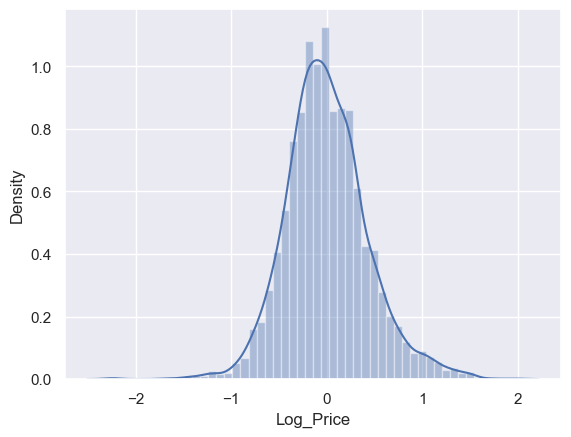

In [84]:
sns.distplot(y_test-y_hat_test)

In [85]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Train the model
model.fit(x_train, y_train)

# Evaluate the model
score = model.score(x_test, y_test)
print("R-squared (R2):", score)

R-squared (R2): 0.73555578054089


In [86]:
y_pred_1 = model.predict(x_train)
y_pred_1

array([3.71981844, 4.26588549, 4.43820992, ..., 3.84502742, 3.8514872 ,
       4.51147199])

In [87]:
errors = abs(y_pred_1 - y_train)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.12 degrees.


In [88]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.27 %.


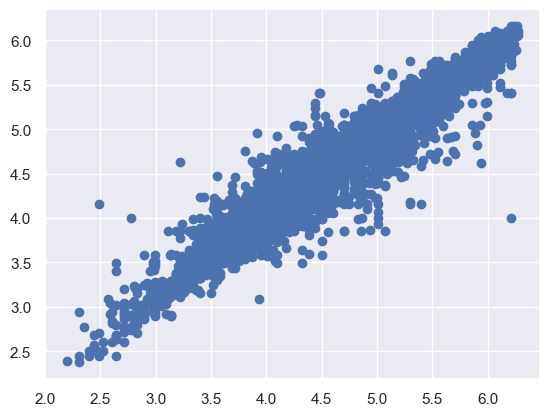

In [89]:
plt.scatter(y_train,y_pred_1)

In [90]:
y_pred = model.predict(x_test)

In [91]:
errors_1 = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors_1), 2), 'degrees.')

Mean Absolute Error: 0.23 degrees.


In [92]:
mape = 100 * (errors_1 / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.65 %.


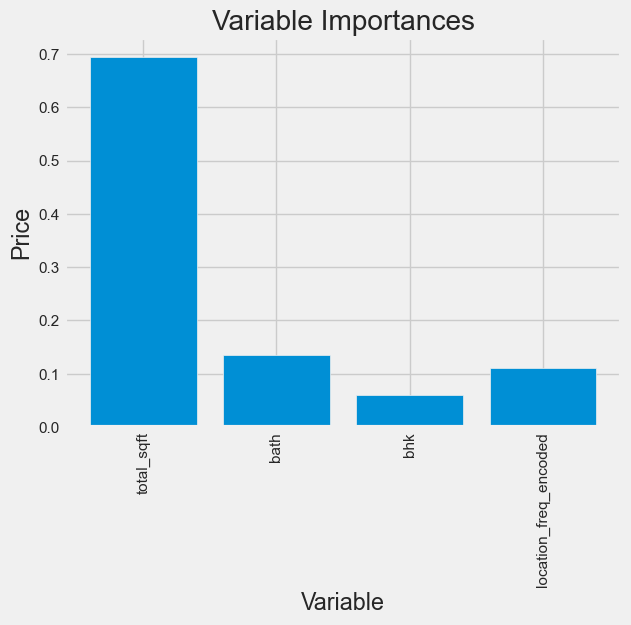

In [93]:
importances = list(model.feature_importances_)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, list(inputs.columns), rotation='vertical')
# Axis labels and title
plt.ylabel('Price'); plt.xlabel('Variable'); plt.title('Variable Importances');

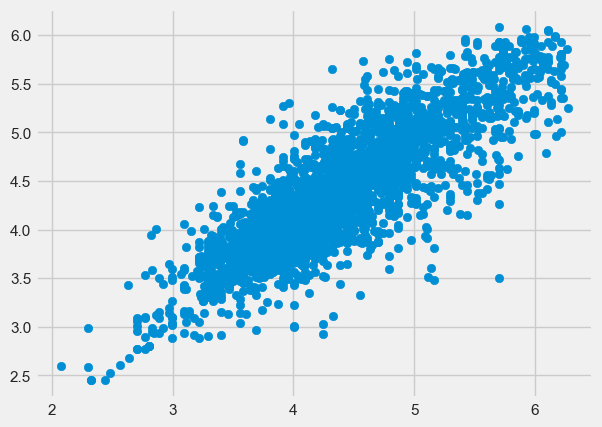

In [94]:
plt.scatter(y_test,y_pred)

In [95]:
adj_r2 = 1 - (1-score)*(n-1)/(n-p-1)
adj_r2

0.7354709752111508

In [96]:
from sklearn.metrics import max_error
max_error(y_train,y_pred_1)

2.211918404346041

In [97]:
X_train = pd.DataFrame(x_train, columns = inputs.columns)

In [100]:
# from sklearn.tree import export_graphviz
# import graphviz
# for i in range(3):
#     tree = model.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=list(X_train.columns),  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
    
# graph = graphviz.Source(dot_data)
# display(graph)
    

In [99]:
# /import pydot

# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# # Write graph to a png file
# graph.write_png('tree.png')